In [13]:
from IPython.display import Image
import math
import pandas as pd

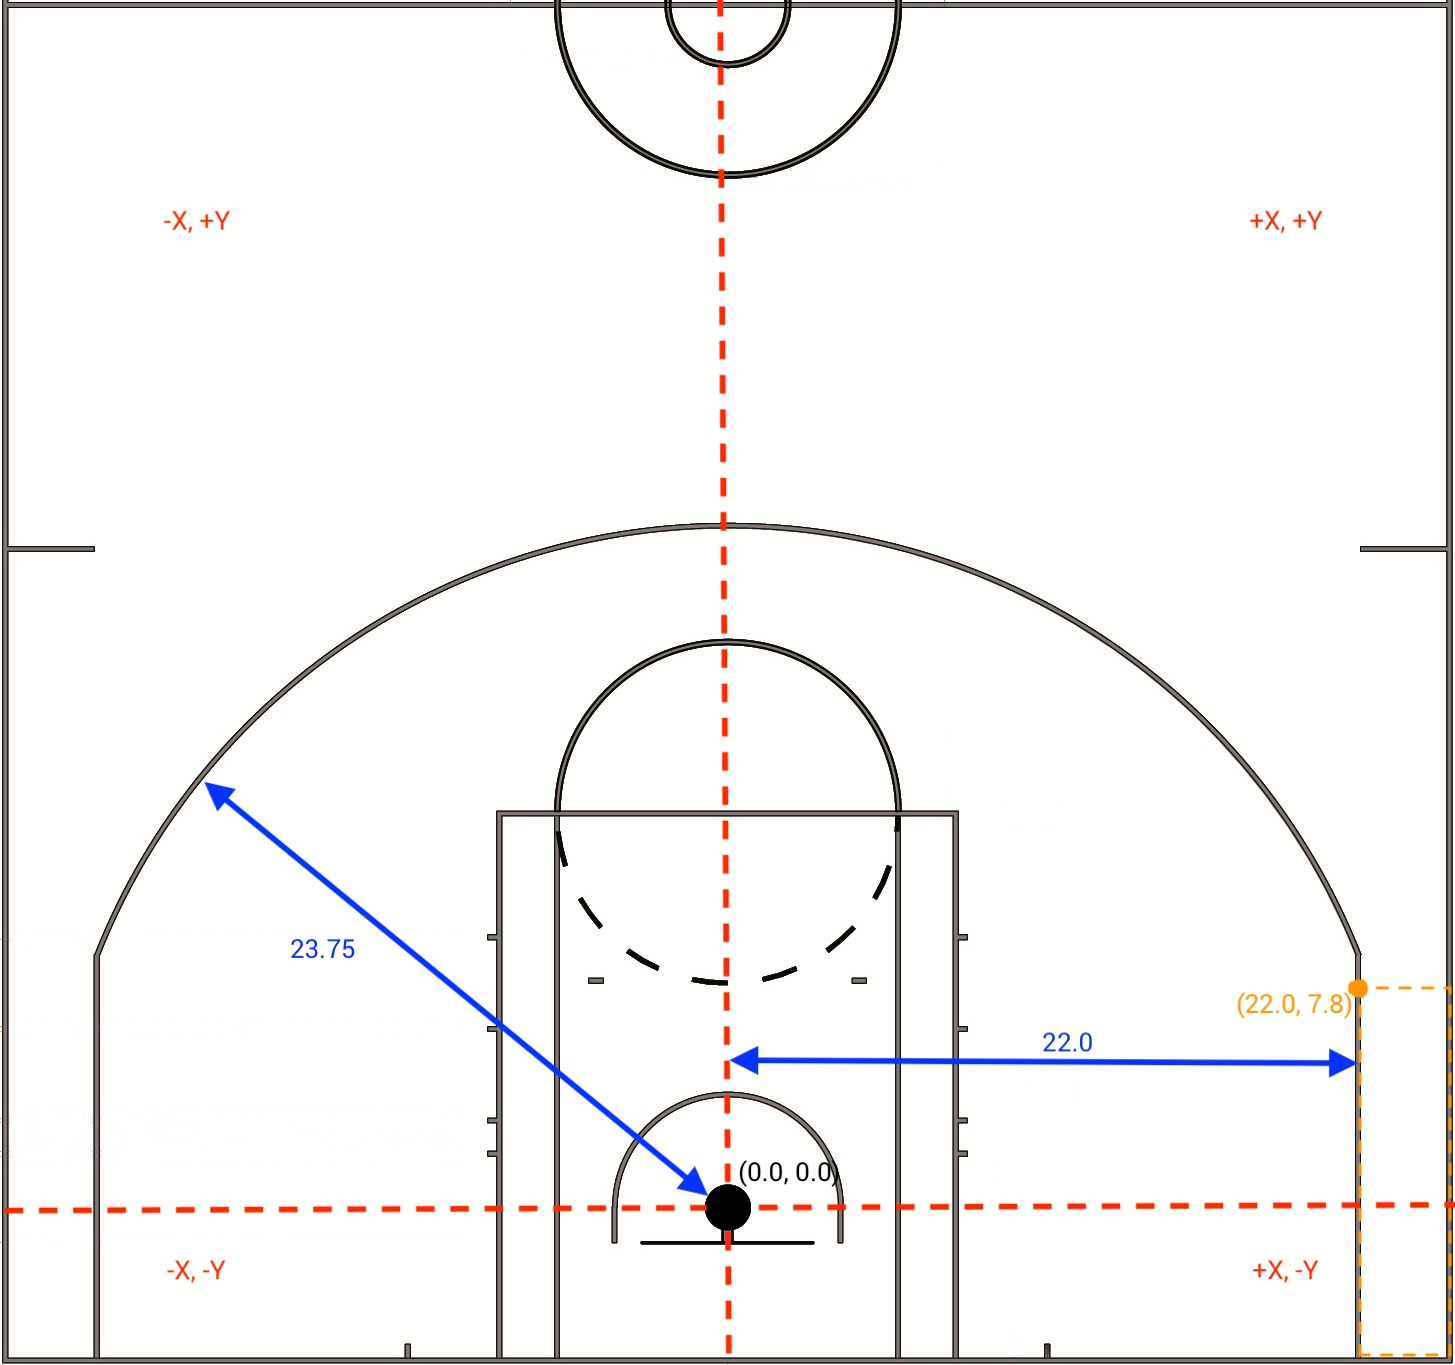

In [7]:
Image("court_diagram.jpg")

In [8]:
shots_data = pd.read_csv('shots_data.csv')

In [36]:
def eFG(FGM, threePM, FGA):
    return (FGM + (0.5*threePM))/FGA

def distance(x, y):
    return math.sqrt(x**2 + y**2)

def calc_splits (df, team_name):
    groups = df.groupby('team')
    team = groups.get_group(team_name)
    SA = team.shape[0]
    C3 = 0
    C3M = 0
    NC3 = 0
    NC3M = 0
    twoPT = 0
    twoPTM = 0
    for index, shot in team.iterrows():
        if (distance(shot['x'], shot['y']) > 22 and shot['y'] < 7.8):
            C3 += 1
            C3M += shot['fgmade']
        elif (distance(shot['x'], shot['y']) > 23.75 and shot['y'] > 7.8):
            NC3 +=1 
            NC3M += shot['fgmade']
        else:
            twoPT += 1
            twoPTM += shot['fgmade']
    
    shots = pd.DataFrame({'C3': [eFG(C3M, C3M, C3), C3/SA], 'NC3': [eFG(NC3M, NC3M, NC3), NC3/SA], '2PT': [eFG(twoPTM, 0, twoPT), twoPT/SA], 'Data': ['eFG%', '%shots']})
    shots= shots.set_index('Data')
    
    return shots

In [47]:
teamA = calc_splits(shots_data, 'Team A')
teamB = calc_splits(shots_data, 'Team B')

print('Team A:')
print('Corner 3 eFG%: {:.4f}'.format(teamA['C3']['eFG%']))
print('Percentage of shots corner 3: {:.4f}'.format(teamA['C3']['%shots']))
print('Non corner 3 eFG%: {:.4f}'.format(teamA['NC3']['eFG%']))
print('Percentage of shots non corner 3: {:.4f}'.format(teamA['NC3']['%shots']))
print('Two pointer eFG%: {:.4f}'.format(teamA['2PT']['eFG%']))
print('Percentage of shots two point range: {:.4f}'.format(teamA['2PT']['%shots']))

print('\nTeam B:')
print('Corner 3 eFG%: {:.4f}'.format(teamB['C3']['eFG%']))
print('Percentage of shots corner 3: {:.4f}'.format(teamB['C3']['%shots']))
print('Non corner 3 eFG%: {:.4f}'.format(teamB['NC3']['eFG%']))
print('Percentage of shots non corner 3: {:.4f}'.format(teamB['NC3']['%shots']))
print('Two pointer eFG%: {:.4f}'.format(teamB['2PT']['eFG%']))
print('Percentage of shots two point range: {:.4f}'.format(teamB['2PT']['%shots']))

Team A:
Corner 3 eFG%: 0.6000
Percentage of shots corner 3: 0.0714
Non corner 3 eFG%: 0.4833
Percentage of shots non corner 3: 0.3214
Two pointer eFG%: 0.4000
Percentage of shots two point range: 0.6071

Team B:
Corner 3 eFG%: 0.3571
Percentage of shots corner 3: 0.0750
Non corner 3 eFG%: 0.5469
Percentage of shots non corner 3: 0.3429
Two pointer eFG%: 0.4601
Percentage of shots two point range: 0.5821
